In [1]:
import pandas as pd, numpy as np
from pygeocoder import Geocoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a=pd.read_csv('Lebanon.csv').replace({',':''},regex=True)

In [3]:
c=a[1:]
ind=range(len(c.index))
c.index=ind

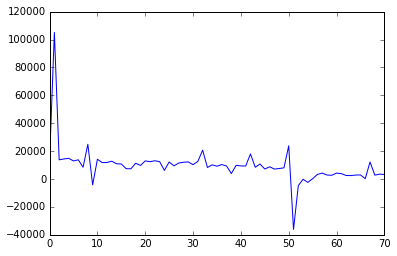

In [4]:
plt.plot(c['Total2'].astype(float)-a['Total2'].astype(float))

In [5]:
b=pd.read_csv('cities v2.csv').replace({',':''},regex=True)

In [6]:
s_cities=a.columns[84:99]

In [7]:
g={}
for s in s_cities:
    print s
    if 'Others' in s:tocode='Syria'
    else: tocode=s
    g[s]=Geocoder.geocode(tocode+', Syria').coordinates
print g

Homs
Aleppo
Idleb
Rural Damascus
Hama
Dar'a
Damascus
Ar-raqqa
Al-hasakeh
Deir-ez-zor
Quneitra
Lattakia
Tartous
As-sweida
Others, n/a
{'Tartous': (34.8959276, 35.8866517), 'Idleb': (35.9310271, 36.6417777), 'Others, n/a': (34.80207499999999, 38.996815), 'Damascus': (33.5138073, 36.2765279), 'Quneitra': (33.0776318, 35.8934136), 'Rural Damascus': (33.5167289, 36.954107), "Dar'a": (32.626434, 36.1033061), 'Homs': (34.7324273, 36.7136959), 'Aleppo': (36.2021047, 37.1342603), 'Ar-raqqa': (35.8059055, 38.9876741), 'Hama': (35.1408881, 36.7551993), 'As-sweida': (32.78857929999999, 37.0400339), 'Deir-ez-zor': (35.3296518, 40.1350341), 'Lattakia': (35.5407103, 35.7952667), 'Al-hasakeh': (36.405515, 40.7969149)}


In [8]:
from math import radians, cos, sin, asin, sqrt
def haversine((lat1, lon1), (lat2,lon2)):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

In [9]:
l_cities=a.columns[18:44]

In [10]:
h={}
for l in l_cities:
    print l[2:]
    if 'Minieh' in l:tocode="  El Mina"
    else: tocode=l
    h[l]=Geocoder.geocode(tocode[2:]+', Lebanon').coordinates
print h

Beirut
El Meten
Baabda
Kesrwane
Chouf
Aley
Jbeil
Akkar
Tripoli
El Minieh-Dennie
El Koura
El Batroun
Zgharta
Bcharre
Zahle
Baalbek
West Bekaa
Rachaya
El Hermel
Sour
Saida
Marjaayoun
Jezzine
El Nabatieh
Hasbaya
Bent Jbeil
{'P_Baabda': (33.8337971, 35.544145), 'P_Zahle': (33.8462558, 35.90195190000001), 'P_Aley': (33.810054, 35.5973754), 'P_Sour': (33.2721571, 35.203278), 'P_Chouf': (33.6483159, 35.5876697), 'P_Zgharta': (34.3963159, 35.8958445), 'P_Jbeil': (34.1230022, 35.6519282), 'P_El Meten': (33.9168612, 35.7188463), 'P_Bcharre': (34.2506516, 36.0117322), 'P_El Nabatieh': (33.37716940000001, 35.4838294), 'P_Bent Jbeil': (33.1172473, 35.4288797), 'P_El Minieh-Dennie': (34.3416667, 35.7605556), 'P_El Hermel': (34.3970517, 36.3871708), 'P_Akkar': (34.5328763, 36.1328132), 'P_West Bekaa': (33.6294745, 35.7625241), 'P_Beirut': (33.8886289, 35.4954794), 'P_Tripoli': (34.4380941, 35.8308371), 'P_Rachaya': (33.5346522, 35.8716137), 'P_Marjaayoun': (33.3594755, 35.5889282), 'P_Kesrwane': (33.

In [11]:
#assignment problem - solved with the Munkres Hungarian algorithm
from munkres import Munkres, print_matrix

In [12]:
#cities should follow rank-size distribution
#https://en.wikipedia.org/wiki/Rank-size_distribution

#we assume the destination distribution follows a rank-size in Lebanon
#then we estimate alfa and beta and average over all weeks
#then we estimate alfa and beta and average over all months
#then we estimate alfa and beta for all timeseries
#recalculate flows using the fitted alfa and beta for latest year
#use Facebook to compare results

In [13]:
i=0
print np.array(a.loc[i]['Total 3'].replace(',','')).astype(float)
print np.array(a.loc[i]['Total2'].replace(',','')).astype(float)

503724.0
503724.0


In [14]:
#perfrom OLS regression directly on pandas dataframe
import statsmodels.formula.api as sm
%matplotlib

Using matplotlib backend: Qt4Agg


In [ ]:
alfa=[]
beta=[]
gamma=[]
C=[]
for s in s_cities:
    for l in l_cities:
        T = np.array(a[s]).astype(float)*\
            np.array(a[l]).astype(float)/\
            np.array(a['Total 3']).astype(float)
        m=np.array(a[l]).astype(float)
        n=np.array(a[s]).astype(float)
        r=haversine(g[s],h[l])
        df=pd.DataFrame({"A":np.log(T),"B":np.log(m),"C":np.log(n),"D":-np.log([r for i in range(len(T))])})
        result = sm.ols(formula="A ~ B + C + D", data=df).fit()
        alfa.append(result.params.B)
        beta.append(result.params.C)
        gamma.append(result.params.D)
        C.append(np.exp(result.params.Intercept))

In [ ]:
alfa2=[]
beta2=[]
gamma2=[]
C2=[]
for s in s_cities:
    for l in l_cities:
        try:
            T = (c[s].astype(float)-a[s].astype(float))*\
                (c[l].astype(float)-a[l].astype(float))/\
                (c['Total 3'].astype(float)-a['Total 3'].astype(float))
            m=c[l].astype(float)-a[l].astype(float)
            n=c[s].astype(float)-a[s].astype(float)
            r=haversine(g[s],h[l])
            df=pd.DataFrame({"A":np.log(T),"B":np.log(m),"C":np.log(n),"D":-np.log([r for i in range(len(T))])})
            result = sm.ols(formula="A ~ B + C + D", data=df).fit()
            if ~(np.isnan(result.params.B)):
                alfa2.append(result.params.B)
            if ~(np.isnan(result.params.C)):
                beta2.append(result.params.C)
            if ~(np.isnan(result.params.D)):
                gamma2.append(result.params.D)
            if ~(np.isnan(result.params.Intercept)):
                C2.append(np.exp(result.params.Intercept))
        except: pass

In [28]:
print np.nanmean(C)
print np.std(C)

0.895517675677
0.139956468816


In [29]:
print np.nanmean(C2)
print np.std(C2)

0.872690235899
0.0561542508755


In [299]:
import seaborn as sns

In [295]:
#fit 1, use 2
k=pd.DataFrame(s_cities).set_index(0)
r=pd.DataFrame(s_cities).set_index(0)
for l in l_cities:
    k[l[2:]]=0
    r[l[2:]]=0
for l in l_cities:
    for s in s_cities:
        k.loc[s][l[2:]]=np.nanmean(C)*np.power(a[l].astype(float)[71],np.nanmean(alfa))*np.power(a[s].astype(float)[71],np.nanmean(beta))/\
            (np.power(haversine(g[s],h[l]),np.nanmean(gamma)))
        r.loc[s][l[2:]]=haversine(g[s],h[l])

In [306]:
#fit 2
k=pd.DataFrame(s_cities).set_index(0)
r=pd.DataFrame(s_cities).set_index(0)
for l in l_cities:
    k[l[2:]]=0
    r[l[2:]]=0
for l in l_cities:
    for s in s_cities:
        k.loc[s][l[2:]]=np.nanmean(C2)*np.power(a[l].astype(float)[71],np.nanmean(alfa2))*np.power(a[s].astype(float)[71],np.nanmean(beta2))/\
            (np.power(haversine(g[s],h[l]),np.nanmean(gamma2)))
        r.loc[s][l[2:]]=haversine(g[s],h[l])

In [307]:
r=r.sort_values(by='Sour',ascending=False).T.sort_values(by='Al-hasakeh',ascending=False)

In [308]:
k=k.sort_values(by='Zahle',ascending=False).T.sort_values(by='Homs',ascending=False)

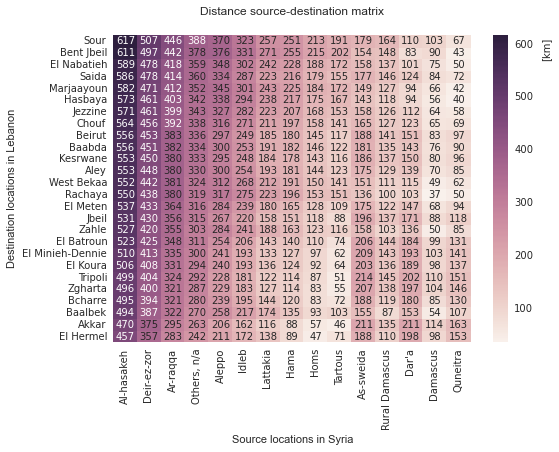

In [309]:
sns.heatmap(r,annot=True, fmt="d")
plt.title("Distance source-destination matrix",y=1.05)
plt.text(18,25,'[km]',rotation=90)
plt.ylabel("Destination locations in Lebanon")
plt.xlabel("Source locations in Syria")
plt.show()

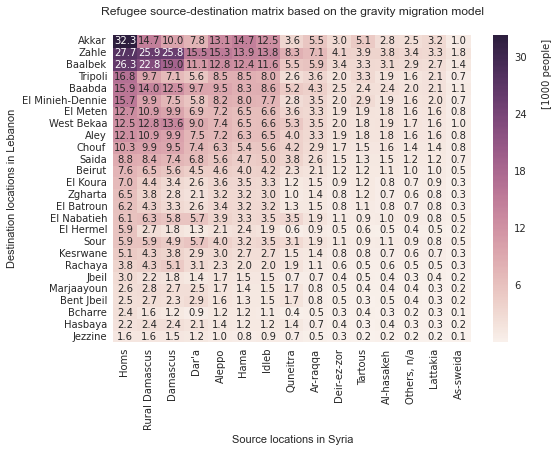

In [310]:
sns.heatmap(k/1000,annot=True, fmt=".1f")
plt.title("Refugee source-destination matrix based on the gravity migration model",y=1.05)
plt.text(18,25,'[1000 people]',rotation=90)
plt.ylabel("Destination locations in Lebanon")
plt.xlabel("Source locations in Syria")
plt.show()

In [311]:
z=pd.DataFrame(s_cities).set_index(0)
z['Error [1000 people]']=0
w=pd.DataFrame(s_cities).set_index(0)
w['Error [%]']=0
for i in range(len(k.sum())):
    z.loc[k.sum().index[i]]=(k.sum()[i]-a[k.sum().index[i]].astype(float)[71])
for i in range(len(k.sum())):
    w.loc[k.sum().index[i]]=(k.sum()[i]-a[k.sum().index[i]].astype(float)[71])/k.sum()[i]

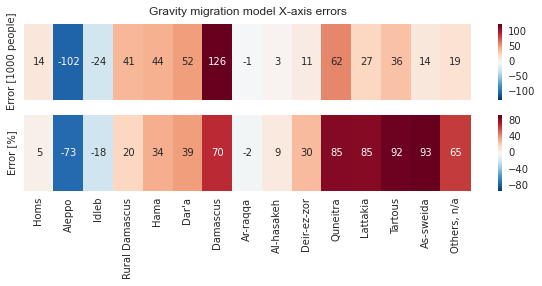

In [312]:
fig,ax=plt.subplots(2,1,figsize=(10,3))
sns.heatmap(z.T/1000,annot=True, fmt=".0f",ax=ax[0],xticklabels=False)
ax[0].set_xlabel('')
ax[0].set_title("Gravity migration model X-axis errors",y=1.05)
sns.heatmap(w.T*100,annot=True, fmt=".0f",ax=ax[1])
plt.xlabel('')
plt.show()

In [313]:
z=pd.DataFrame([i[2:] for i in l_cities]).set_index(0)
z['Error [1000 people]']=0
w=pd.DataFrame([i[2:] for i in l_cities]).set_index(0)
w['Error [%]']=0
for i in range(len(k.T.sum())):
    z.loc[k.T.sum().index[i]]=(k.T.sum()[i]-a['P_'+k.T.sum().index[i]].astype(float)[71])
for i in range(len(k.T.sum())):
    w.loc[k.T.sum().index[i]]=(k.T.sum()[i]-a['P_'+k.T.sum().index[i]].astype(float)[71])/k.T.sum()[i]

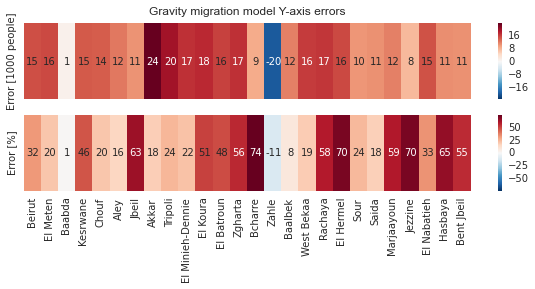

In [314]:
fig,ax=plt.subplots(2,1,figsize=(10,3))
sns.heatmap(z.T/1000,annot=True, fmt=".0f",ax=ax[0],xticklabels=False)
ax[0].set_xlabel('')
ax[0].set_title("Gravity migration model Y-axis errors",y=1.05)
sns.heatmap(w.T*100,annot=True, fmt=".0f",ax=ax[1])
plt.xlabel('')
plt.show()

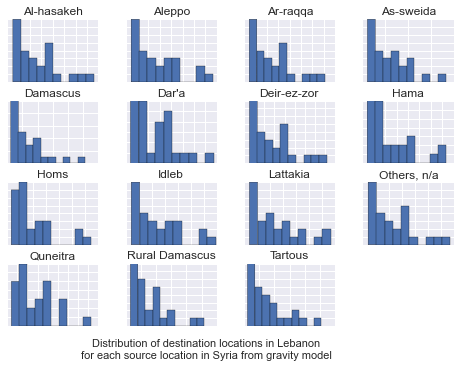

In [370]:
histos=k.hist()
for i in range(len(histos)):
    for j in range(len(histos[i])):
        histos[i][j].set_xlabel('')
        histos[i][j].set_xticklabels('')
        #histos[i][j].set_yscale('log')
        histos[i][j].set_yticklabels('')
histos[3][1].set_xlabel("                       Distribution of destination locations in Lebanon\n                       for each source location in Syria from gravity model")
plt.show()

In [368]:
k.columns

Index([u'Homs', u'Rural Damascus', u'Damascus', u'Dar'a', u'Aleppo', u'Hama',
       u'Idleb', u'Quneitra', u'Ar-raqqa', u'Deir-ez-zor', u'Tartous',
       u'Al-hasakeh', u'Others, n/a', u'Lattakia', u'As-sweida'],
      dtype='object', name=0)